### Никишев И.О. 224-321 ЛР5
Цель - Провести сравнительный анализ алгоритмов выделения контуров на
конкретных примерах изображений.

1. Провести выделение контуров в изображениях с без шума и с
шумом с помощью операторов Робертса, Превитта, Собела и
Лапласина гауссиана
2. Оценить площадь занятую контурами в изображениях Sk
3. Оценить эффективность выделения контуров

0.1929535078806537

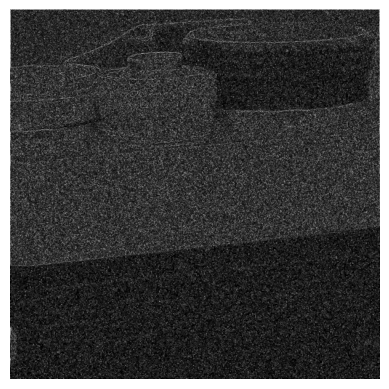

In [5]:
import cv2, numpy as np, matplotlib.pyplot as plt
# image1 = cv2.imread('test5_0.jpg')[:,:,0]
# image1 = cv2.imread('test5_1.jpg')[:,:,0]
# image1 = cv2.imread('test5_2.jpg')[:,:,0]
# image1 = cv2.imread('test5_3.jpg')[:,:,0]
# image1 = cv2.imread('test5_4.jpg')[:,:,0]
image1 = cv2.imread('test5_5.jpg')[:,:,0]

def a(image):
    plt.axis('off')
    plt.margins(x=0)
    plt.imshow(image, cmap='gray', vmin=0, vmax=255)

def norm(image):
    return (image/(np.max(image)/255)).astype(np.uint8)

from scipy.signal import convolve2d
def roberts(image):
    gx = convolve2d(image, [[1,0],[0,-1]])
    gy = convolve2d(image, [[0,1],[-1,0]])
    return norm((gx**2 + gy**2)**0.5)

def sk(image):
    return len(image[image>64])/image.size

a(roberts(image1.copy()))
sk(roberts(image1.copy()))

0.1232436728071434

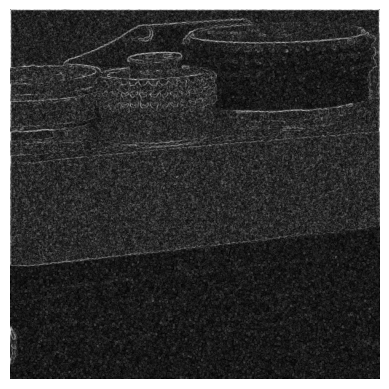

In [6]:
def prewitt(image):
    gx = convolve2d(image, [[1,0,-1],[1,0,-1],[1,0,-1],])
    gy = convolve2d(image, [[1,1,1],[0,0,0],[-1,-1,-1],])
    return norm((gx**2 + gy**2)**0.5)
a(prewitt(image1.copy()))
sk(prewitt(image1.copy()))

0.13901336629838523

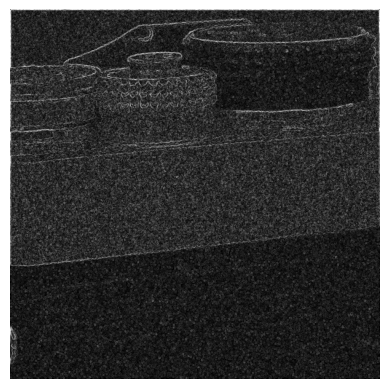

In [7]:
def sobel(image):
    gx = convolve2d(image, [[1,0,-1],[2,0,-2],[1,0,-1],])
    gy = convolve2d(image, [[1,2,1],[0,0,0],[-1,-2,-1],])
    return norm((gx**2 + gy**2)**0.5)

a(sobel(image1.copy()))
sk(sobel(image1.copy()))

0.1646161732666923

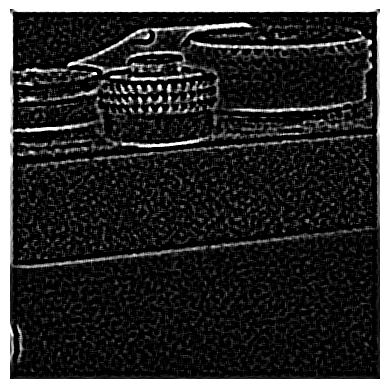

In [8]:
def laplacian_of_gaussian(image, sigma=3, l=11):
    gauss = np.linspace(-(l - 1)/2, (l - 1)/2, l)
    gauss = np.exp(-0.5 * np.square(gauss) / np.square(sigma))
    gauss = np.outer(gauss, gauss)
    laplace = [[0,1,0],[1,-4,1],[0,1,0]]
    kernel = convolve2d(gauss, laplace)
    return convolve2d(image, kernel)

a(laplacian_of_gaussian(image1.copy()))
sk(laplacian_of_gaussian(image1.copy()))